In [1]:
from glob import glob
from natsort import natsorted
import numpy as np

In [2]:
OUTPUT_DIR = "output/20231031111251/"

In [3]:
metrics_files = natsorted(glob(f"{OUTPUT_DIR}*/*/*/metrics.npz"))

In [4]:
metrics_files

['output/20231031111251/cnn/DCTPA/results/metrics.npz',
 'output/20231031111251/cnn/DCTPAUS/results/metrics.npz',
 'output/20231031111251/cnn/DCTUS/results/metrics.npz',
 'output/20231031111251/cnn/GaborPA/results/metrics.npz',
 'output/20231031111251/cnn/GaborPAUS/results/metrics.npz',
 'output/20231031111251/cnn/GaborUS/results/metrics.npz',
 'output/20231031111251/cnn/PA/results/metrics.npz',
 'output/20231031111251/cnn/PAUS/results/metrics.npz',
 'output/20231031111251/cnn/US/results/metrics.npz',
 'output/20231031111251/densenet/DCTPA/results/metrics.npz',
 'output/20231031111251/densenet/DCTPAUS/results/metrics.npz',
 'output/20231031111251/densenet/DCTUS/results/metrics.npz',
 'output/20231031111251/densenet/GaborPA/results/metrics.npz',
 'output/20231031111251/densenet/GaborPAUS/results/metrics.npz',
 'output/20231031111251/densenet/GaborUS/results/metrics.npz',
 'output/20231031111251/densenet/PA/results/metrics.npz',
 'output/20231031111251/densenet/PAUS/results/metrics.npz',

In [5]:
metrics = {}

for metrics_file in metrics_files:
    modality = metrics_file.split("/")[-3]
    model_name = metrics_file.split("/")[-4]
    
    saved_metrics = np.load(metrics_file)
    metrics[(modality, model_name)] = {"tpr":saved_metrics["tpr"], "fpr":saved_metrics["fpr"], "thresholds":saved_metrics["thresholds"], "roc_auc":saved_metrics["roc_auc"]}

In [6]:
metrics

{('DCTPA',
  'cnn'): {'tpr': array([0.        , 0.00190114, 0.00380228, ..., 0.99619772, 0.99809886,
         1.        ]), 'fpr': array([0., 0., 0., ..., 1., 1., 1.]), 'thresholds': array([       inf, 0.86673266, 0.8494633 , ..., 0.20649078, 0.16924335,
         0.16503547], dtype=float32), 'roc_auc': array(0.54256423)},
 ('DCTPAUS',
  'cnn'): {'tpr': array([0.        , 0.00190114, 0.00380228, ..., 1.        , 1.        ,
         1.        ]), 'fpr': array([0.        , 0.        , 0.        , ..., 0.99626168, 0.99813084,
         1.        ]), 'thresholds': array([          inf, 9.9955183e-01, 9.9954420e-01, ..., 1.3371857e-03,
         1.1745555e-03, 8.2134706e-04], dtype=float32), 'roc_auc': array(0.6954799)},
 ('DCTUS',
  'cnn'): {'tpr': array([0.        , 0.        , 0.00190114, ..., 0.99619772, 0.99809886,
         1.        ]), 'fpr': array([0.        , 0.00186916, 0.00186916, ..., 1.        , 1.        ,
         1.        ]), 'thresholds': array([          inf, 9.7349596e-01,

In [38]:
model_results = {}

for key in metrics.keys():
    _, model_name = key
    model_results[model_name] = {
        "fpr": [],
        "tpr": [],
        "thresholds": [],
        "roc_auc": [],
        "labels": [],
    }

In [39]:
model_results

{'cnn': {'fpr': [], 'tpr': [], 'thresholds': [], 'roc_auc': [], 'labels': []},
 'densenet': {'fpr': [],
  'tpr': [],
  'thresholds': [],
  'roc_auc': [],
  'labels': []},
 'swin': {'fpr': [], 'tpr': [], 'thresholds': [], 'roc_auc': [], 'labels': []},
 'vit': {'fpr': [], 'tpr': [], 'thresholds': [], 'roc_auc': [], 'labels': []}}

In [40]:
for key, saved_met_dict in metrics.items():
    modality, model_name = key
    
    label = f"{modality} - {model_name}"
    
    fpr = saved_met_dict["fpr"]
    tpr = saved_met_dict["tpr"]
    thresholds = saved_met_dict["thresholds"]
    roc_auc = saved_met_dict["roc_auc"]
    

    model_results[model_name]["fpr"].append(fpr)
    model_results[model_name]["tpr"].append(tpr)
    model_results[model_name]["thresholds"].append(thresholds)
    model_results[model_name]["roc_auc"].append(roc_auc)
    model_results[model_name]["labels"].append(label)

In [41]:
import matplotlib.pyplot as plt

def plot_curves(model_dict, model_name):
    labels = model_dict["labels"]
    fpr = model_dict["fpr"]
    tpr = model_dict["tpr"]
    roc_auc = model_dict["roc_auc"]

    plt.figure(figsize=(8, 6))
    for i in range(len(labels)):
        linestyle = 'solid'
        if 'DCT' in labels[i]:
            linestyle = 'dashed'
        elif 'Gabor' in labels[i]:
            linestyle = 'dotted'
        plt.plot(fpr[i], tpr[i], linestyle=linestyle, label=f"{labels[i]} (area = {roc_auc[i]:0.2f})")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place the legend outside
    plt.savefig('all_roc_curves.png')  # Save the combined ROC curves
    plt.show()  # Display the combined ROC curves

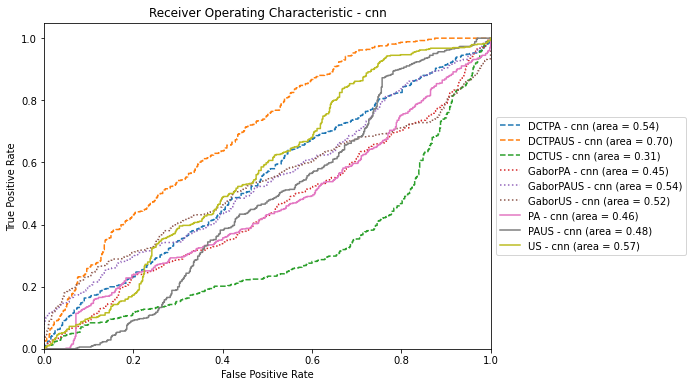

In [42]:
model_name = "cnn"
plot_curves(model_results[model_name], model_name)

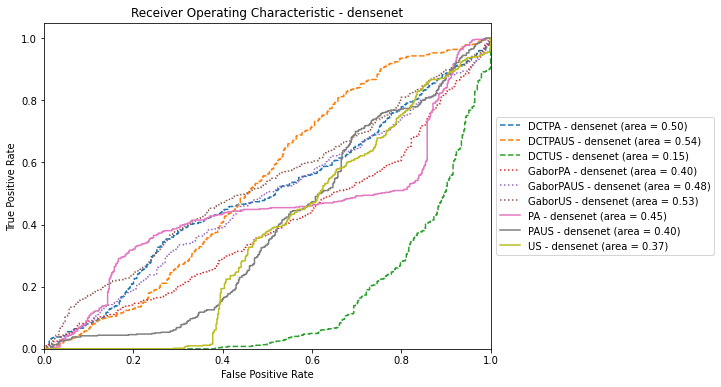

In [43]:
model_name = "densenet"
plot_curves(model_results[model_name], model_name)

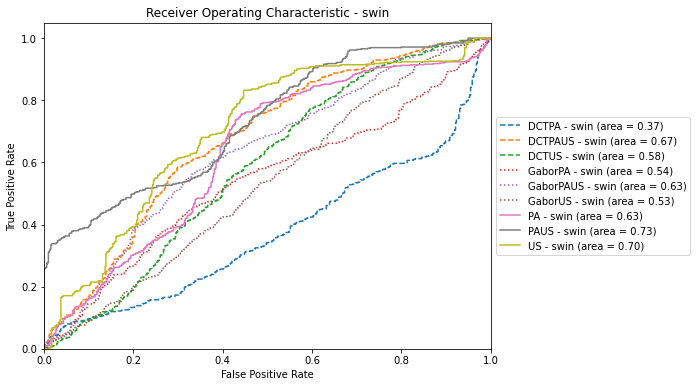

In [44]:
model_name = "swin"
plot_curves(model_results[model_name], model_name)

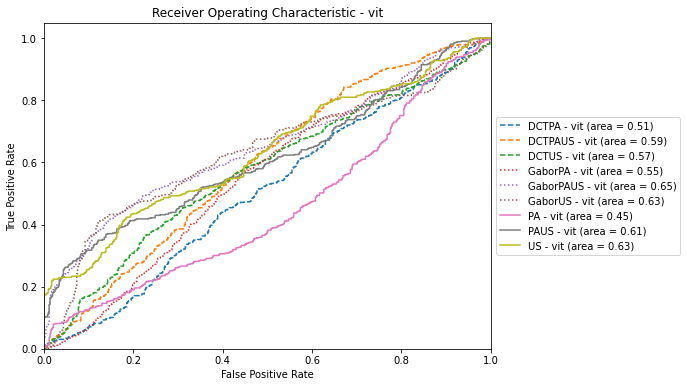

In [45]:
model_name = "vit"
plot_curves(model_results[model_name], model_name)